In [1]:
import os
from ipywidgets import widgets
from IPython.display import clear_output
from PIL import Image
import numpy as np


In [366]:
# base_dir = '/ibex/project/c2241/data/diffusion/w_plus_img_cams_ids_0.7_2m_largefov_largestd_seed567'
base_dir = '/datawaha/cggroup/parawr/Projects/diffusion/data/gen_images/w_plus_img_cams_ids_0.7_2m_final'
base_dir = '/datawaha/cggroup/parawr/Projects/diffusion/data/gen_images/w_plus_cams_ids_0.7_frontal_demo_seed42'
# base_dir = '/datawaha/cggroup/parawr/Projects/diffusion/data/gen_images/w_plus_paper_42'


img_dir = os.path.join(base_dir, 'images')
seg_dir = os.path.join(base_dir, 'seg')

In [138]:
names = ['background', 'neck', 'face', 'cloth', 'rr', 'lr', 'rb', 'lb', 're',
                    'le', 'nose', 'imouth', 'llip', 'ulip', 'hair',
                    'eyeg', 'hat', 'earr', 'neck_l']

for ii, n in enumerate(names):
    print(ii, n)

0 background
1 neck
2 face
3 cloth
4 rr
5 lr
6 rb
7 lb
8 re
9 le
10 nose
11 imouth
12 llip
13 ulip
14 hair
15 eyeg
16 hat
17 earr
18 neck_l


In [4]:
# create a random color_map
cmap = np.array([
    np.array((1.0, 1.0, 1.0), np.float32),
    np.array((255, 250, 79), np.float32) / 255.0,  # neck
    np.array([255, 125, 138], np.float32) / 255.0,  # face
    np.array([213, 32, 29], np.float32) / 255.0,  # cloth
    np.array([196, 0, 253], np.float32) / 255.0,  # rr
    np.array([32, 32, 187], np.float32) / 255.0,  # lr
    np.array([255, 129, 54], np.float32) / 255.0,  # rb
    np.array([88, 0, 135], np.float32) / 255.0,  # lb
    np.array([253, 103, 58], np.float32) / 255.0,  # re
    np.array((0.5, 0.5, 0.5), np.float32),  # le
    np.array((255, 0, 100), np.float32) / 255.0,  # nose
    np.array((32, 120, 120), np.float32) / 255.0,  # imouth
    np.array((16, 240, 240), np.float32) / 255.0,  # llip
    np.array((0.0, 1.0, 0.5), np.float32),  # ulip
    np.array((0.1, 0.1, 0.1), np.float32),  # hair
    np.array((0.5, 1.0, 0.1), np.float32),  # eyeg
    np.array((1.0, 0.0, 0.5), np.float32),  # hat
    np.array((1.0, 1.0, 0.5), np.float32),  # earr
]
)
print(cmap.shape)

cmap = (cmap * 255).astype(np.uint8)

(18, 3)


In [5]:
import colorsys
import random

def _gen_random_colors(N, bright=True):
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors


cmap = [
    np.array((1.0, 1.0, 1.0), np.float32),
    np.array((255, 250, 79), np.float32) / 255.0, # neck
    np.array([255, 125, 138], np.float32) / 255.0,  # face
    np.array([213, 32, 29], np.float32) / 255.0,  # cloth
    np.array([0, 144, 187], np.float32) / 255.0,  # rr
    np.array([0, 196, 253], np.float32) / 255.0,  # lr
    np.array([255, 129, 54], np.float32) / 255.0,  # rb
    np.array([88, 233, 135], np.float32) / 255.0,  # lb
    np.array([0, 117, 27], np.float32) / 255.0,  # re
    np.array([255, 76, 249], np.float32) / 255.0,  # le
    np.array((1.0, 0.0, 0.0), np.float32),  # nose
    np.array((255, 250, 100), np.float32) / 255.0,  # imouth
    np.array((255, 0, 127), np.float32) / 255.0,  # llip
    np.array((255, 145, 164), np.float32),  # ulip
    np.array((0.0, 1.0, 0.5), np.float32),  # hair
    np.array((1.0, 0.0, 0.5), np.float32),# eyeg
] + _gen_random_colors(15)# hat
# earr
cmap = (np.array(cmap) * 255).astype(np.uint8)

print(cmap.shape)

(31, 3)


In [139]:
cmap = np.load('cmap.npy')

In [375]:

# Output widget to display selected image
out = widgets.Output()
button = widgets.ToggleButtons(
    options=['On', 'Off'],
    description='Overlay:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
)
slider = widgets.IntSlider(
    min=0, #1900000,
    max=0+4096,
    description='Select Image:',
    value=0  # Default value
)


overlay_transparency = True
idx = 0 + 894
_img = 0
_seg = 0
_hair_mask = 0

# Display image function
def display_image():
    global idx, overlay_transparency, _img, _seg, _hair_mask
    img = Image.open(os.path.join(img_dir, str(idx).zfill(7) + '.png'))
    if overlay_transparency:
        seg_map = Image.open(os.path.join(seg_dir, str(idx).zfill(7) + '.png'))
        _hair_mask = np.array(seg_map) == 14
        
        
        
        _colored = cmap[np.asarray(seg_map).astype(np.int32)]
        seg_map = Image.fromarray(_colored)
        _img = img
        img = Image.blend(img, seg_map, 0.5)
        _seg = seg_map
        
    with out:
        clear_output(wait=True)
        display(img)

# Set the callback for the button
def on_button_clicked(b):
    global overlay_transparency
    if b['new'] == 'On':
        overlay_transparency = True
    else:
        overlay_transparency = False
    display_image()

# Set the callback for the dropdown
def on_value_change(change):
    global idx
    idx = change['new']
    display_image()
    
slider.observe(on_value_change, names='value')
button.observe(on_button_clicked, names='value')

# Initial display
display(slider)
display(button)
display(out)
display_image()  # Display the first image by default

IntSlider(value=0, description='Select Image:', max=4096)

ToggleButtons(description='Overlay:', options=('On', 'Off'), value='On')

Output()

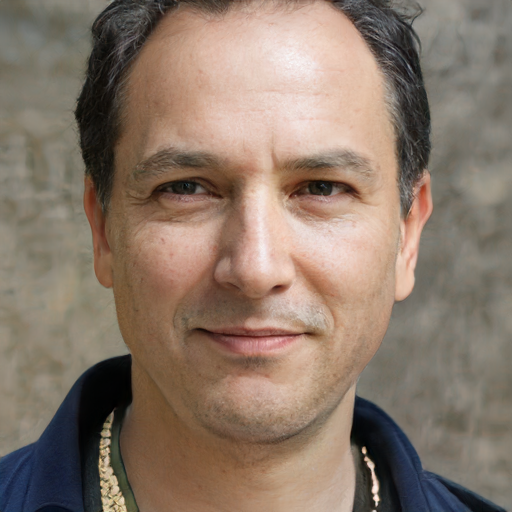

In [373]:
_img

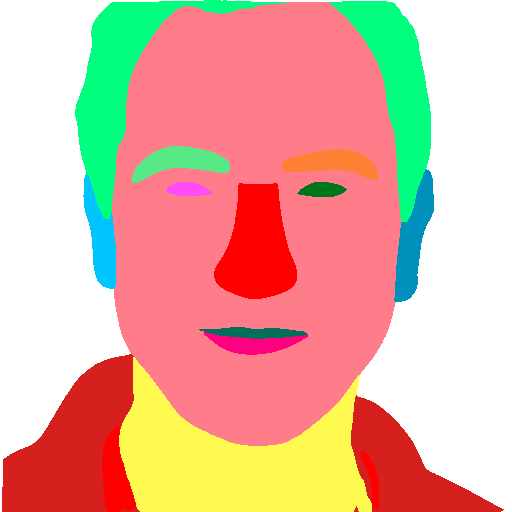

In [374]:
_seg

In [106]:
hair_mask = Image.fromarray(_seg.astype(np.uint8) * 255)

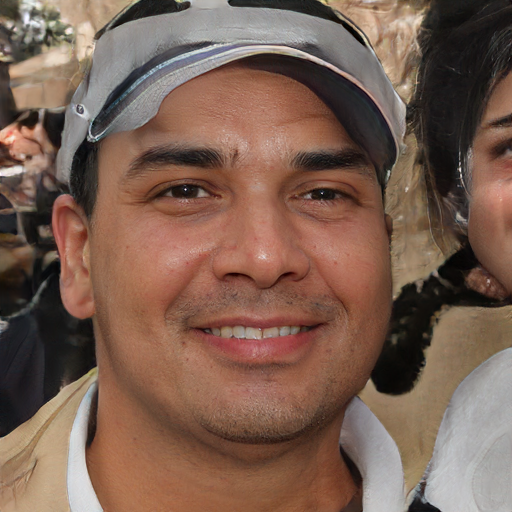

In [356]:
_img

In [92]:
np.unique(np.array(hair_mask))

array([  0, 255], dtype=uint8)

In [268]:
_hair_mask

0

In [298]:
mask = np.any((np.array(_seg) != cmap[1]), axis=-1)
mask = np.logical_and(mask, np.any((np.array(_seg) != cmap[2]), axis=-1))
mask = np.logical_and(mask, np.any((np.array(_seg) != cmap[4]), axis=-1))
mask = np.logical_and(mask, np.any((np.array(_seg) != cmap[5]), axis=-1))
mask = np.logical_and(mask, np.any((np.array(_seg) != cmap[10]), axis=-1))

In [314]:
mask = np.any((np.array(_seg) != loaded_np), axis=-1)

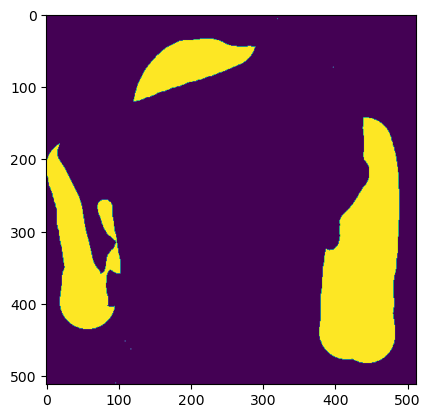

In [317]:
plt.imshow(mask)

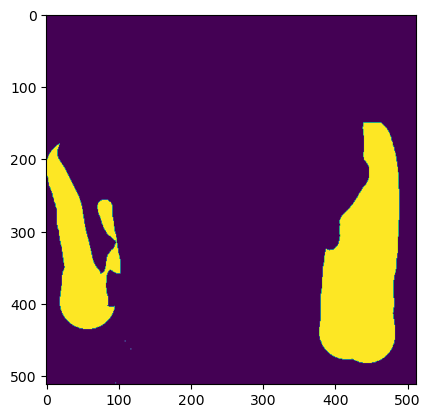

In [326]:
plt.imshow(mask)

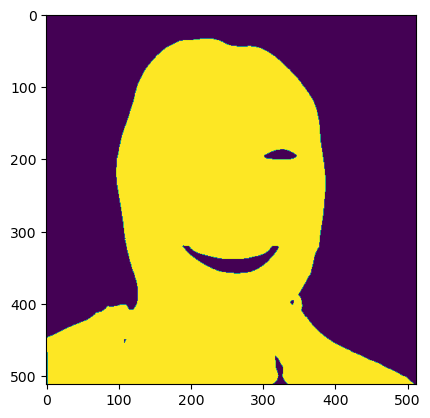

In [289]:
plt.imshow(alpha)

In [296]:
bb.

AttributeError: shape

In [342]:
_loaded

NameError: name '_loaded' is not defined

In [336]:
np.unique(alpha)

array([255.])

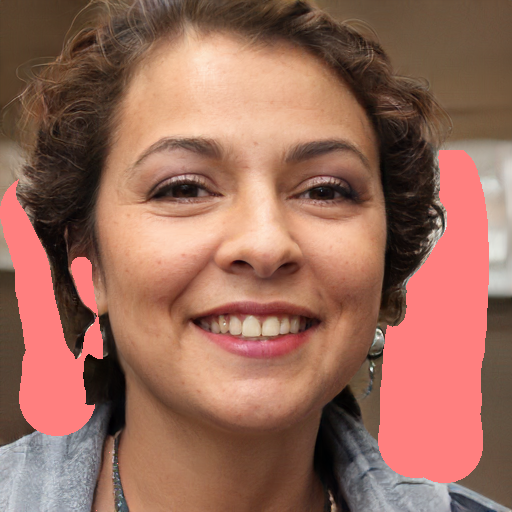

In [340]:
h = _hair_mask.copy()
h = np.array(h)
h = np.resize(h, (512, 512, 1))

alpha = (1 -mask[..., None]).astype(np.uint8) *127
alpha = alpha + 128
# alpha=np.ones((512,512,1)) * 255

# _new = np.concatenate([_img, alpha], axis=-1)

bb = np.array(_img.copy())
# print(bb.shape)
bb[(mask)] = (255, 0, 0)

_new = np.concatenate([bb, alpha], axis=-1)

Image.fromarray(_new, mode='RGBA')

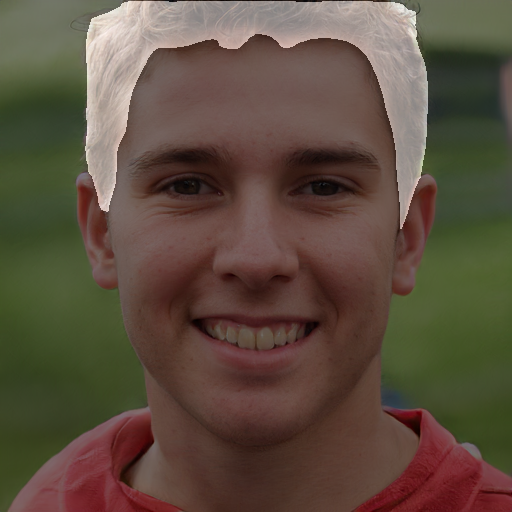

In [86]:
blend = Image.blend(_img, hair_mask.convert('RGB'), 0.5)
blend


In [24]:
0.8*255

204.0

In [27]:
_img.putalpha(255)

In [28]:
aa = _img.copy()

In [30]:
bb = _img.copy()

In [113]:
rgb_np = np.asarray(_img)
seg_np = np.asarray(_seg)

In [114]:
seg_np.shape, rgb_np.shape

((512, 512, 3), (512, 512, 3))

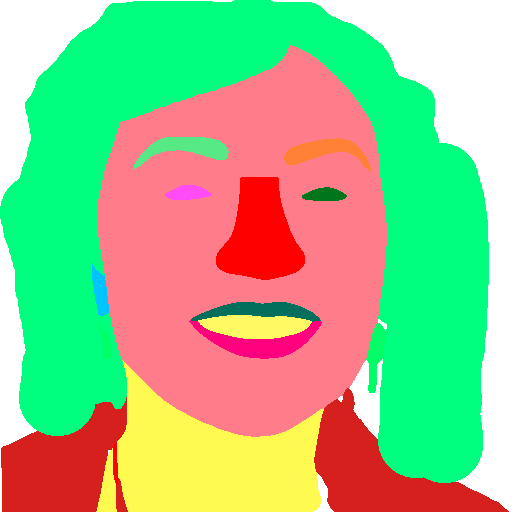

In [344]:
loaded

In [343]:
loaded = Image.open('/datawaha/cggroup/parawr/Projects/diff2/notebooks/paper_latents/edited_14_2.png').convert('RGB')
loaded_np = np.asarray(loaded)

In [307]:
loaded_np.shape

(512, 512, 4)

In [312]:

face_mask = np.any(seg_np == loaded_np, axis=-1)
# neck_mask = seg_np == cmap[1]
# nose_mask = seg_np == cmap[10]
# face_mask = np.logical_or(face_mask, neck_mask)
# face_mask = np.logical_or(face_mask, nose_mask)
# face_mask = np.all(face_mask, axis=-1)
print(face_mask.shape)

(512, 512)


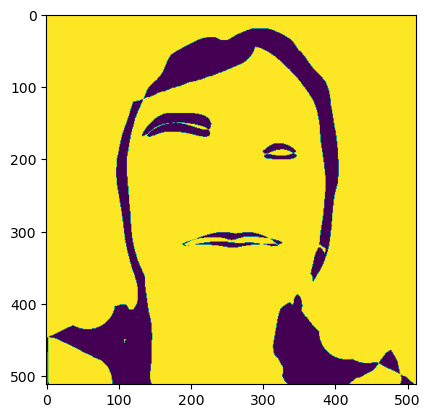

In [313]:
plt.imshow(face_mask)

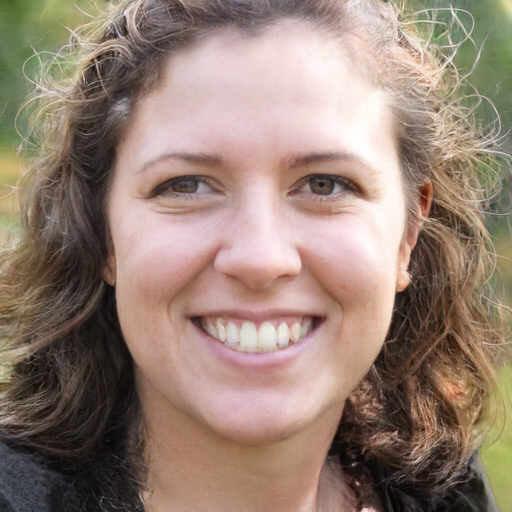

In [132]:
_img

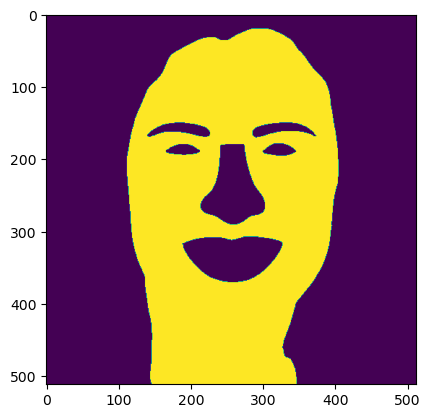

In [118]:
import matplotlib.pyplot as plt
plt.imshow(np.all(face_mask, axis=-1))

In [128]:
rgb_np_edited = rgb_np.copy()

rgb_np_edited[np.all(face_mask, axis=-1)] = 127

In [124]:
face_mask.shape

(512, 512, 3)

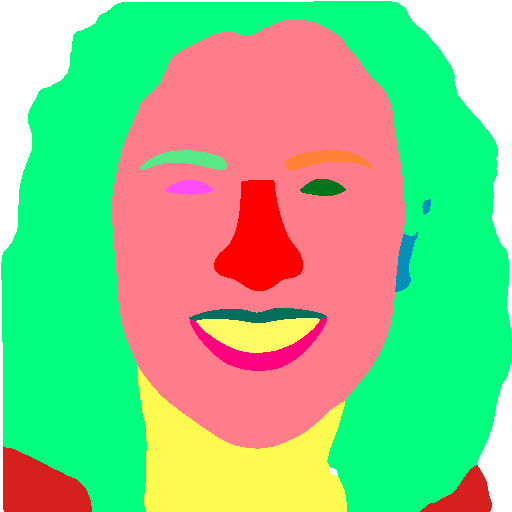

In [131]:
_seg

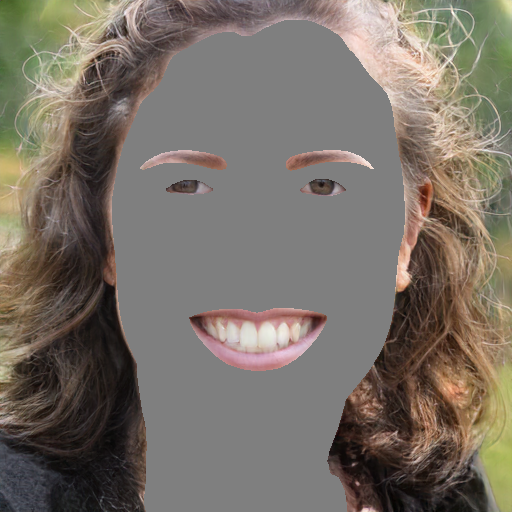

In [129]:
Image.fromarray(rgb_np_edited)

In [8]:
from utils.editing import Viewer
import numpy as np
from PIL import Image
import os


# images = [np.random.rand(256,256,3) for _ in range(10)]
# images = [(i*255).astype(np.uint8) for i in images]
# masks = [np.random.rand(256,256) for _ in range(10)]
# masks = [(i*19).astype(np.uint8) for i in masks]
images = [np.array(Image.open(os.path.join(img_dir, str(i).zfill(7) + '.png'))) for i in range(1_000_000, 1_000_000+10)]
masks = [np.array(Image.open(os.path.join(seg_dir, str(i).zfill(7) + '.png'))) for i in range(1_000_000, 1_000_000+10)]

viewer = Viewer(images, masks)

In [9]:
viewer.show()

ToggleButtons(description='Overlay:', options=('On', 'Off'), value='On')

IntSlider(value=0, continuous_update=False, description='Frame:', max=9)

Output()

/tmp/ipykernel_34133/173381482.py:1: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  Image.open(os.path.join(img_dir, str(97).zfill(7) + '.png')).resize((256,256), Image.BILINEAR)


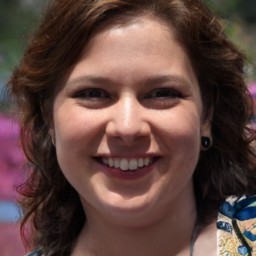

In [18]:
Image.open(os.path.join(img_dir, str(97).zfill(7) + '.png')).resize((256,256), Image.BILINEAR)

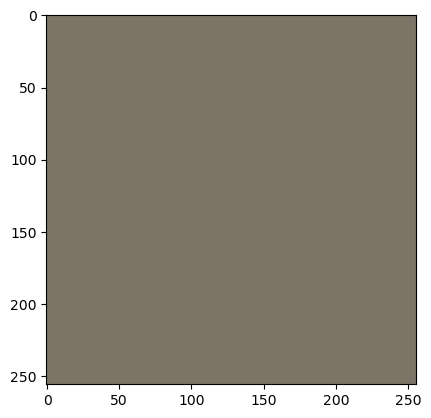

In [376]:
import numpy as np

import matplotlib.pyplot as plt

plt.imshow(np.ones((256,256, 3)) * (0.485, 0.456, 0.406))